<a href="https://colab.research.google.com/github/RahulDogra-92/Supervised-Learning-Pipeline/blob/main/Supervised_Learning_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")  #Ignore the warnings
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
train = pd.read_csv('train_s3TEQDk.csv')

In [5]:
# Inspect the first few lines of your data using head()
train.head(3)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0


In [6]:
# Count the number of missing values in each column
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [7]:
# Fill the missing categorical values with mode
train['Credit_Product'].fillna(str(train['Credit_Product'].mode().values[0]),inplace=True)

In [8]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

#Feature Engineering

In [9]:
#List of all column names whose data types are string,
train_categorical = train.select_dtypes(include=['object'])
train_categorical.head(3)

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,NNVBBKZB,Female,RG268,Other,X3,No,No
1,IDD62UNG,Female,RG277,Salaried,X1,No,No
2,HD3DSEMC,Female,RG268,Self_Employed,X3,No,Yes


In [10]:
train_categorical.drop(['ID'],axis=1,inplace=True)
train_categorical.head(3)

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,Female,RG268,Other,X3,No,No
1,Female,RG277,Salaried,X1,No,No
2,Female,RG268,Self_Employed,X3,No,Yes


In [11]:
# Create a label encoder for each column. Encode the values
le = preprocessing.LabelEncoder()
train_categorical = train_categorical.apply(le.fit_transform)
train_categorical.head(3)

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,0,18,1,2,0,0
1,0,27,2,0,0,0
2,0,18,3,2,0,1


In [12]:
# Inspect the data types of the columns of the data frame
print(train_categorical.dtypes)

Gender            int64
Region_Code       int64
Occupation        int64
Channel_Code      int64
Credit_Product    int64
Is_Active         int64
dtype: object


In [13]:
train = train.drop(train.select_dtypes(include=['object']), axis=1)
train = pd.concat([train,train_categorical], axis=1)
train.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,73,43,1045696,0,0,18,1,2,0,0
1,30,32,581988,0,0,27,2,0,0,0
2,56,26,1484315,0,0,18,3,2,0,1
3,34,19,470454,0,1,20,2,0,0,0
4,30,33,886787,0,0,32,2,0,0,0


In [14]:
train['Is_Lead'] = train['Is_Lead'].astype('category')

In [15]:
#For train dataset
X = train.drop('Is_Lead',axis=1)
y = train['Is_Lead']

#Your First Pipeline

In [16]:
# Split the data into train and test, with 20% as test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1)

In [17]:
# Create a random forest classifier, fixing the seed to 2
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [18]:
# Use it to predict the labels of the test data
rf_predictions = rf_model.predict(X_test)

In [19]:
# Assess the accuracy of both classifiers
print(accuracy_score(y_test, rf_predictions))

0.7796113541560687


#Model complexity and overfitting

Grid search CV for model complexity


In [24]:
# Set a range for n_estimators from 10 to 40 in steps of 10
param_grid = {'n_estimators': range(10, 50, 10)}

# Optimize for a RandomForestClassifier() using GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
grid.best_params_

{'n_estimators': 40}

#Adapt your code to optimise n_estimators for an AdaBoostClassifier().

In [26]:
from sklearn.ensemble import AdaBoostClassifier
# Define a grid for n_estimators ranging from 1 to 10
param_grid = {'n_estimators': range(1, 11)}

# Optimize for a AdaBoostClassifier() using GridSearchCV
grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3)
grid.fit(X, y)
grid.best_params_

{'n_estimators': 9}

#Adapt your code to optimise n_neighbors for an KNeighborsClassifier().

In [27]:
from sklearn.neighbors import KNeighborsClassifier
# Define a grid for n_neighbors with values 10, 50 and 100
param_grid = {'n_neighbors': [10, 50, 100]}

# Optimize for KNeighborsClassifier() using GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
grid.fit(X, y)
grid.best_params_

{'n_neighbors': 100}


# Number of trees and estimators

Random forests are an ensemble over a large number of decision trees. The number of trees used is controlled by a parameter called n_estimators

#Feature Importance

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

[0.20104427 0.20966471 0.30382196 0.00857168 0.14108175 0.05036228
 0.05653241 0.0135799  0.01534104]


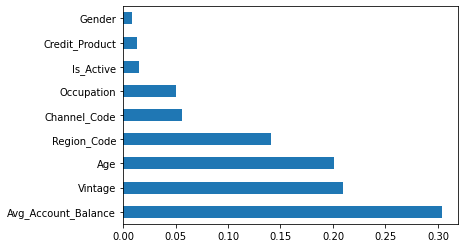

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#Bringing it all together


In [ ]:
# Find the best value for max_depth among values 2, 5 and 10
param_grid = {'max_depth': [2,5,10]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid)
best_value = grid_search.fit(X_train, y_train)
best_value.best_params_